In [313]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [314]:
import stats
import data

import requests

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Relevant data RICs and dates

In [319]:
start_date = '2017-01-01'
end_date =  '2019-06-01'

bond_fields = ['TRDPRC_1', 'OPEN_PRC', 'HIGH_1', 'LOW_1']
yield_fields = ['A_YLD_1', 'B_YLD_1', 'HIGH_YLD', 'LOW_YLD']

benchmark_price = data.get_historical_pricing_data('.IDCOT7TR', 'TRDPRC_1', start_date, end_date)

bond_yield_2Y = data.get_historical_pricing_data('US2YT=RR', yield_fields, start_date, end_date)
bond_yield_5Y = data.get_historical_pricing_data('US5YT=RR', yield_fields, start_date, end_date)
bond_yield_10Y = data.get_historical_pricing_data('US10YT=RR', yield_fields, start_date, end_date)

bond_future_2Y = data.get_historical_pricing_data('TUc1', bond_fields, start_date, end_date)
bond_future_5Y = data.get_historical_pricing_data('FVc1', bond_fields, start_date, end_date)
bond_future_10Y = data.get_historical_pricing_data('TYc1', bond_fields, start_date, end_date)

In [321]:
benchmark_price.to_csv('data/benchmark_price.csv')
bond_yield_2Y.to_csv('data/bond_yield_2Y.csv')
bond_yield_5Y.to_csv('data/bond_yield_5Y.csv')
bond_yield_10Y.to_csv('data/bond_yield_10Y.csv')

bond_future_2Y.to_csv('data/bond_future_2Y.csv')
bond_future_5Y.to_csv('data/bond_future_5Y.csv')
bond_future_10Y.to_csv('data/bond_future_10Y.csv')

In [322]:
bond_future_10Y

,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
DATE,,,,
2017-01-03,124.109375,124.125000,124.234375,123.578125
2017-01-04,124.203125,124.140625,124.281250,123.859375
2017-01-05,124.968750,124.203125,125.031250,124.109375
2017-01-06,124.375000,124.953125,125.328125,124.312500
2017-01-09,124.843750,124.390625,124.859375,124.234375
2017-01-10,124.765625,124.828125,124.921875,124.625000
2017-01-11,124.734375,124.781250,125.203125,124.578125
2017-01-12,124.875000,124.765625,125.328125,124.750000
2017-01-13,124.656250,124.875000,125.312500,124.343750


#### Statistics for the benchmark

All the relevant metrics mentioned in:  
https://ideas.ubs.com/subdomain/bonds-hedging-strategy/end/campaign_overview

------------------------------
Total % Return:        3.606%
Total % Annual Return: 1.838%
Maximum % Drawdown:    -6.273%
Sharpe Ratio:          2.377
------------------------------


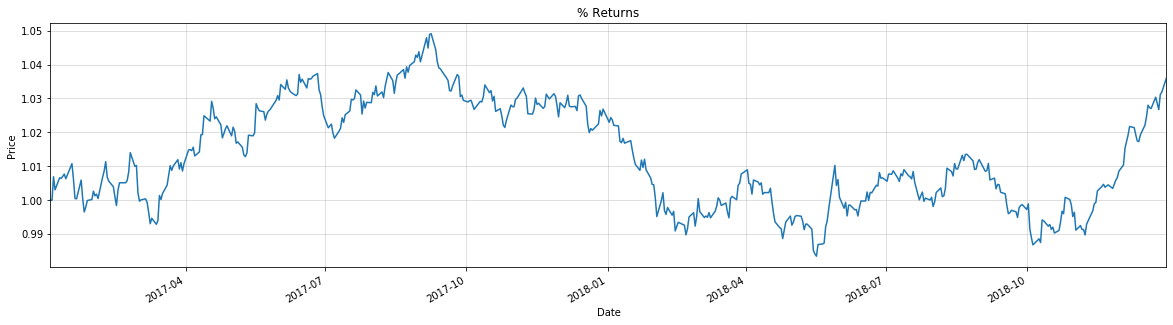

In [271]:
stats.print_full_statistics(benchmark_price)